In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd
import copy
import json
import pickle
from networkFunctions import *
from plotFunctions import *
from populationGraph import populationGraph
from adversarialAgent import adversarialAgent

In [2]:
import chart_studio.plotly as py
import plotly.tools as tls
x = np.arange(0.1,1,0.2)
y = np.arange(0,1,0.2)
mpl_fig = plt.figure()
plt.plot(x,y)
plotly_fig = py.plot_mpl(mpl_fig,filename="janvi")
# py.iplot(plotly_fig)



In [2]:
my_dict = pickle.load(open('pickle_files/vary_type.pkl', 'rb'))
my_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': ['Utilitarian', 'Deontic', 'Virtue', 'Transcendence'],
 'advRatio': 0,
 'outcomeNetwork': {'Utilitarian': <populationGraph.populationGraph at 0x7fe94e6e7190>,
  'Deontic': <populationGraph.populationGraph at 0x7fe954e6a490>,
  'Virtue': <populationGraph.populationGraph at 0x7fe954eaf2e0>,
  'Transcendence': <populationGraph.populationGraph at 0x7fe954ef34f0>}}

In [14]:
best_util = my_dict["outcomeNetwork"]["Utilitarian"]

In [11]:
my_dict["outcomeNetwork"]["Transcendence (0.5)"]=my_dict["outcomeNetwork"]["Transcendence"]
del my_dict["outcomeNetwork"]["Transcendence"]

In [12]:
my_dict["outcomeNetwork"].keys()

dict_keys(['Utilitarian', 'Deontic', 'Virtue', 'Transcendence (0.5)'])

In [16]:
# plotNetworkVaryParams(my_dict["outcomeNetwork"],'utility',attr="type",plotType='bar')

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fe94e6e7190>, 'Deontic': <populationGraph.populationGraph object at 0x7fe954e6a490>, 'Virtue': <populationGraph.populationGraph object at 0x7fe954eaf2e0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fe954ef34f0>}


[93.2, 85.6, 87.8, 92.8]

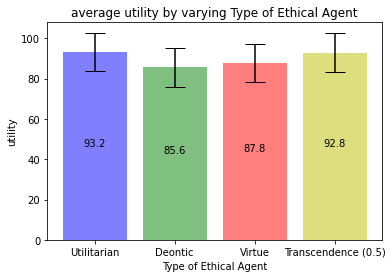

In [18]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'utility',"Type of Ethical Agent",plotType='bar',metric="mean",fig_label="vary_bar/utility")

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fe94e6e7190>, 'Deontic': <populationGraph.populationGraph object at 0x7fe954e6a490>, 'Virtue': <populationGraph.populationGraph object at 0x7fe954eaf2e0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fe954ef34f0>}


[19.66, 19.28, 19.39, 19.64]

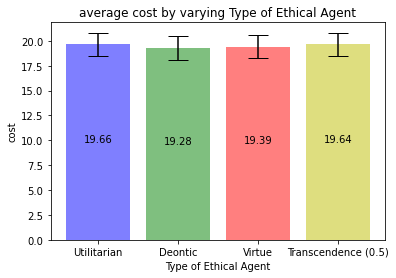

In [20]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'cost',"Type of Ethical Agent",plotType='bar',metric="mean",fig_label="vary_bar/cost")

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fe94e6e7190>, 'Deontic': <populationGraph.populationGraph object at 0x7fe954e6a490>, 'Virtue': <populationGraph.populationGraph object at 0x7fe954eaf2e0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fe954ef34f0>}


[34, 34, 32, 34]

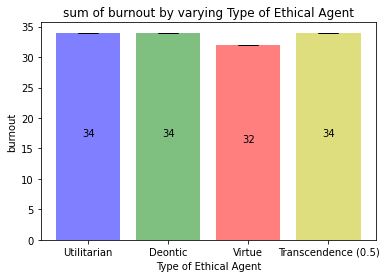

In [21]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'burnout',"Type of Ethical Agent",plotType='bar',fig_label="vary_bar/burnout")

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7fe94e6e7190>, 'Deontic': <populationGraph.populationGraph object at 0x7fe954e6a490>, 'Virtue': <populationGraph.populationGraph object at 0x7fe954eaf2e0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x7fe954ef34f0>}


[34, 34, 32, 34]

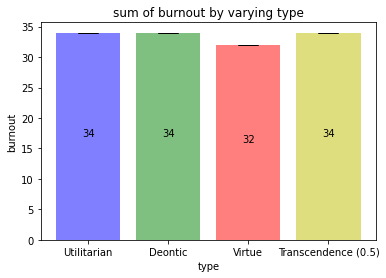

In [16]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'burnout',"type",plotType='bar')

In [2]:
deontic_dict = pickle.load(open('pickle_files/AdvRatio/Deontic.pkl', 'rb'))
util_dict = pickle.load(open('pickle_files/AdvRatio/Utilitarian.pkl', 'rb'))
virtue_dict = pickle.load(open('pickle_files/AdvRatio/Virtue.pkl', 'rb'))
trans_dict = pickle.load(open('pickle_files/AdvRatio/Transcendence(0.5).pkl', 'rb'))
translow_dict = pickle.load(open('pickle_files/AdvRatio/Transcendence(0.1).pkl', 'rb'))
transhigh_dict = pickle.load(open('pickle_files/AdvRatio/Transcendence(1).pkl', 'rb'))
transDict = {0.1:translow_dict["outcomeNetwork"],1:transhigh_dict["outcomeNetwork"]}

In [3]:
trans_dict_quarter = pickle.load(open('pickle_files/AdvRatio/Transcendence(0.25).pkl', 'rb'))
trans_dict_quarter

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 32,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7ff1a419ef40>,
  0.1: <populationGraph.populationGraph at 0x7ff185575e20>,
  0.2: <populationGraph.populationGraph at 0x7ff1860e1910>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7ff18717aaf0>,
  0.4: <populationGraph.populationGraph at 0x7ff1873a9970>,
  0.5: <populationGraph.populationGraph at 0x7ff1877c76a0>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7ff1879348e0>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7ff18799f0a0>,
  0.8: <populationGraph.populationGraph at 0x7ff187b007c0>,
  0.9: <populationGraph.populationGraph at 0x7ff187b58a30>}}

In [4]:
trans_dict_quarter2 = pickle.load(open('pickle_files/AdvRatio/Transcedence(0.75).pkl', 'rb'))
trans_dict_quarter2

FileNotFoundError: [Errno 2] No such file or directory: 'pickle_files/AdvRatio/Transcedence(0.75).pkl'

In [4]:
outcomeList = {"Deontology":deontic_dict["outcomeNetwork"], "Utilittarian":util_dict["outcomeNetwork"], "Transcendence(0.25)":trans_dict_quarter["outcomeNetwork"],
"Virtue":virtue_dict["outcomeNetwork"]}

Text(0, 0.5, 'Total Cost')

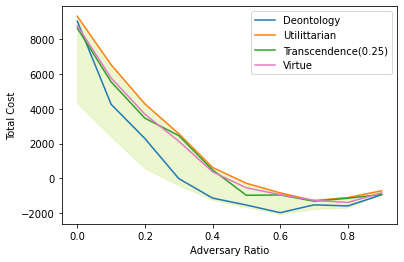

In [28]:
fig, ax = plt.subplots()
color_list = ['tab:blue','tab:orange','tab:green','tab:pink']
count=0
for outcome in outcomeList:
    # print(outcom  e)
    var = outcomeList[outcome]
    y_vals = []
    y_vals_adv = []
    for graph in var:
        # print(var[graph])
        types = list(var[graph].getAgentMapping().values())
        # print(types)
        G = var[graph].getGraph()
        agentDict = {}
        for i in types:
            agentDict[i] = []
        for agents in G:
            agentType = G.nodes[agents]['agent'].getType()
            agentDict[agentType].append(G.nodes[agents]['agent'])
        # print(agentDict)
        for i in agentDict:
            if(len(agentDict[i]) != 0):
                agentDict[i] = np.sum([agent.getProperty('utility') for agent in agentDict[i]])
            else:
                agentDict[i] = 0
        # print(agentDict)
        y_vals.append(agentDict[types[0]])
        y_vals_adv.append(agentDict[types[1]])
    ax.plot(list(outcomeList[outcome].keys()), y_vals,color=color_list[count])
    count+=1
# ax.plot(list(outcomeList["Transcendence(0.5)"].keys()), y_vals_adv,color='r')
y_vals_trans = []
for outcome in transDict:
    var = transDict[outcome]
    y_vals = []
    # y_vals_adv = []
    for graph in var:
        types = list(var[graph].getAgentMapping().values())
        G = var[graph].getGraph()
        agentDict = {}
        for i in types:
            agentDict[i] = []
        for agents in G:
            agentType = G.nodes[agents]['agent'].getType()
            agentDict[agentType].append(G.nodes[agents]['agent'])
        for i in agentDict:
            if(len(agentDict[i]) != 0):
                agentDict[i] = np.sum([agent.getProperty('utility') for agent in agentDict[i]])
            else:
                agentDict[i] = 0
        y_vals.append(agentDict[types[0]])
    y_vals_trans.append(y_vals)
        # y_vals_adv.append(agentDict[types[1]])
    # ax.plot(list(outcomeList[outcome].keys()), y_vals)

ax.fill_between(list(transDict[0.1].keys()),y_vals_trans[0],y_vals_trans[1],color='#c3e462',alpha=0.3)
list1 = list(outcomeList.keys())
# list1.append("Adversary") 
ax.legend(list1)
ax.set_xlabel("Adversary Ratio")
ax.set_ylabel("Total Cost")
# fig.savefig("results/adv/burnout.png", dpi=600)




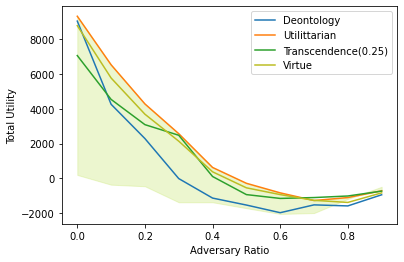

In [9]:
# new_dict = {"Transcendence":trans_dict["outcomeNetwork"]}
advRatio_shadedPlots(outcomeList,transDict,'utility',"Utility",fig_label="adv/utility")

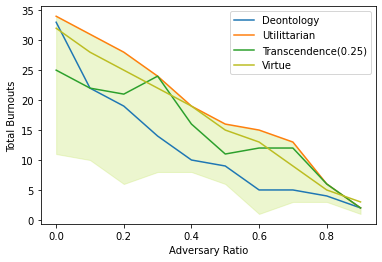

In [10]:
advRatio_shadedPlots(outcomeList,transDict,'burnout',"Burnouts",fig_label="adv/burnout")

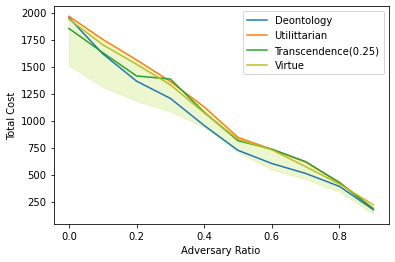

In [11]:
advRatio_shadedPlots(outcomeList,transDict,'cost',"Cost",fig_label="adv/cost")

[1939.0,
 1825.0,
 1742.0,
 1653.0,
 1554.0,
 1436.0,
 1377.0,
 1312.0,
 1233.0,
 1141.0]

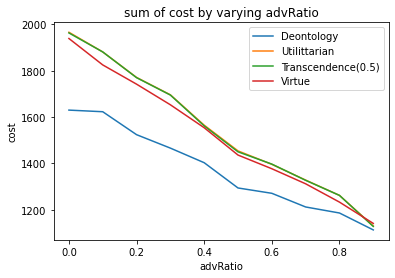

In [16]:
plotComparative(outcomeList,"cost","advRatio")

[19.39, 18.25, 17.42, 16.53, 15.54, 14.36, 13.77, 13.12, 12.33, 11.41]

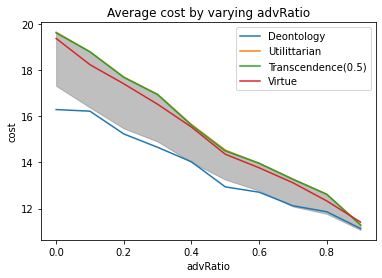

In [17]:
plotComparative_shaded(outcomeList,transDict,"cost","advRatio",metric="mean")

In [ ]:
num_msg_dict = pickle.load(open('pickle_files/vary_type_10kmsg', 'rb'))
num_msg_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': ['Utilitarian', 'Deonotology', 'Virtue', 'Transcendence (0.5)'],
 'advRatio': 0,
 'outcomeNetwork': {'Utilitarian': <populationGraph.populationGraph at 0x22bc2b4ab90>,
  'Deonotology': <populationGraph.populationGraph at 0x22bc56cb0a0>,
  'Virtue': <populationGraph.populationGraph at 0x22bc4fae2c0>,
  'Transcendence (0.5)': <populationGraph.populationGraph at 0x22bc4f33b80>}}

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x0000022BC2B4AB90>, 'Deonotology': <populationGraph.populationGraph object at 0x0000022BC56CB0A0>, 'Virtue': <populationGraph.populationGraph object at 0x0000022BC4FAE2C0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x0000022BC4F33B80>}


[81940, 46220, 81940, 81900]

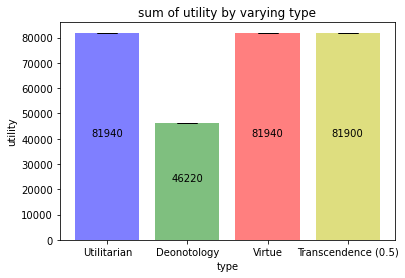

In [ ]:
plotNetworkVaryParams(num_msg_dict["outcomeNetwork"],'utility',"type",plotType='bar')

In [3]:
gamma_dict = pickle.load(open('pickle_files/vary_gamma.pkl', 'rb'))
gamma_dict

# best_trans = gamma_dict["outcomeNetwork"][1]

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 32,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': 0,
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'outcomeNetwork': {0.1: <populationGraph.populationGraph at 0x7ffad97a0d30>,
  0.2: <populationGraph.populationGraph at 0x7ffadb70d610>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7ffadb7f3c10>,
  0.4: <populationGraph.populationGraph at 0x7ffadb79d880>,
  0.5: <populationGraph.populationGraph at 0x7ffadba055e0>,
  0.6: <populationGraph.populationGraph at 0x7ffadbaaf400>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7ffadbb57400>,
  0.8: <populationGraph.populationGraph at 0x7ffadbe01460>,
  0.9: <populationGraph.populationGraph at 0x7ffadbeaa760>,
  1.0: <populationGraph.populationGraph at 0x7ffadbf53a60>}}

outcome network  {0.1: <populationGraph.populationGraph object at 0x7ffad97a0d30>, 0.2: <populationGraph.populationGraph object at 0x7ffadb70d610>, 0.30000000000000004: <populationGraph.populationGraph object at 0x7ffadb7f3c10>, 0.4: <populationGraph.populationGraph object at 0x7ffadb79d880>, 0.5: <populationGraph.populationGraph object at 0x7ffadba055e0>, 0.6: <populationGraph.populationGraph object at 0x7ffadbaaf400>, 0.7000000000000001: <populationGraph.populationGraph object at 0x7ffadbb57400>, 0.8: <populationGraph.populationGraph object at 0x7ffadbe01460>, 0.9: <populationGraph.populationGraph object at 0x7ffadbeaa760>, 1.0: <populationGraph.populationGraph object at 0x7ffadbf53a60>}


[4340, 7980, 9020, 9280, 9280, 9320, 9320, 9320, 9320, 9320]

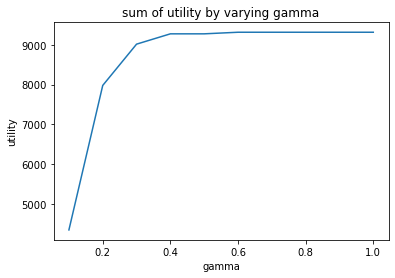

In [7]:
plotNetworkVaryParams(gamma_dict["outcomeNetwork"],'utility',"gamma",fig_label="vary/vary_gamma",metric="sum")
# plt.savefig("/results/vary_gamma.png", dpi=600)


outcome network  {0.1: <populationGraph.populationGraph object at 0x7ffad97a0d30>, 0.2: <populationGraph.populationGraph object at 0x7ffadb70d610>, 0.30000000000000004: <populationGraph.populationGraph object at 0x7ffadb7f3c10>, 0.4: <populationGraph.populationGraph object at 0x7ffadb79d880>, 0.5: <populationGraph.populationGraph object at 0x7ffadba055e0>, 0.6: <populationGraph.populationGraph object at 0x7ffadbaaf400>, 0.7000000000000001: <populationGraph.populationGraph object at 0x7ffadbb57400>, 0.8: <populationGraph.populationGraph object at 0x7ffadbe01460>, 0.9: <populationGraph.populationGraph object at 0x7ffadbeaa760>, 1.0: <populationGraph.populationGraph object at 0x7ffadbf53a60>}


[17, 29, 33, 34, 34, 34, 34, 34, 34, 34]

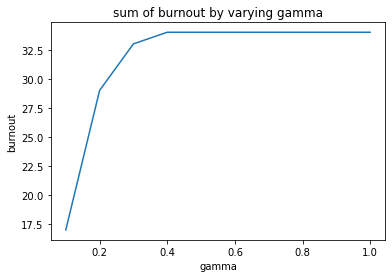

In [12]:
plotNetworkVaryParams(gamma_dict["outcomeNetwork"],'burnout',"gamma")

In [5]:
fp_dict = pickle.load(open('pickle_files/vary_fp.pkl', 'rb'))
best_deontic = fp_dict["outcomeNetwork"][1]

outcome network  {0.1: <populationGraph.populationGraph object at 0x7ffad97a0e80>, 0.2: <populationGraph.populationGraph object at 0x7ffadb6c38b0>, 0.30000000000000004: <populationGraph.populationGraph object at 0x7ffadb7260a0>, 0.4: <populationGraph.populationGraph object at 0x7ffadb758910>, 0.5: <populationGraph.populationGraph object at 0x7ffadb7fe100>, 0.6: <populationGraph.populationGraph object at 0x7ffadb92f9a0>, 0.7000000000000001: <populationGraph.populationGraph object at 0x7ffadb966280>, 0.8: <populationGraph.populationGraph object at 0x7ffadb987a30>, 0.9: <populationGraph.populationGraph object at 0x7ffadb9bd2e0>, 1.0: <populationGraph.populationGraph object at 0x7ffadb9c9f40>}


[-7480, -5920, -4020, -2160, -120, 1480, 3320, 5580, 7340, 9040]

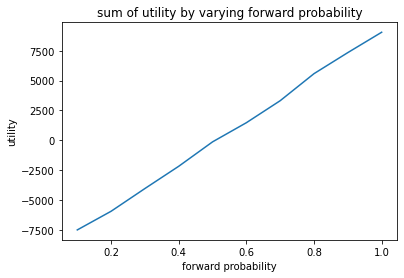

In [8]:
plotNetworkVaryParams(fp_dict["outcomeNetwork"],'utility',"forward probability",fig_label="vary/vary_fp",metric="sum")

outcome network  {0.1: <populationGraph.populationGraph object at 0x7ffad97a0e80>, 0.2: <populationGraph.populationGraph object at 0x7ffadb6c38b0>, 0.30000000000000004: <populationGraph.populationGraph object at 0x7ffadb7260a0>, 0.4: <populationGraph.populationGraph object at 0x7ffadb758910>, 0.5: <populationGraph.populationGraph object at 0x7ffadb7fe100>, 0.6: <populationGraph.populationGraph object at 0x7ffadb92f9a0>, 0.7000000000000001: <populationGraph.populationGraph object at 0x7ffadb966280>, 0.8: <populationGraph.populationGraph object at 0x7ffadb987a30>, 0.9: <populationGraph.populationGraph object at 0x7ffadb9bd2e0>, 1.0: <populationGraph.populationGraph object at 0x7ffadb9c9f40>}


[1126.0,
 1204.0,
 1299.0,
 1392.0,
 1494.0,
 1574.0,
 1666.0,
 1779.0,
 1867.0,
 1952.0]

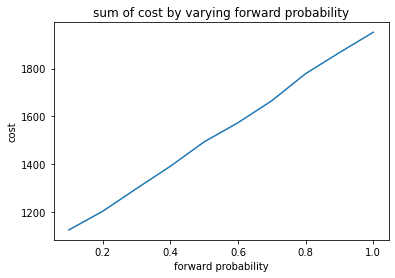

In [10]:
plotNetworkVaryParams(fp_dict["outcomeNetwork"],'cost',"forward probability",fig_label="vary/vary_fp",metric="sum")

In [13]:
bin_dict = pickle.load(open('pickle_files/vary_bin.pkl', 'rb'))
bin_dict
# best_virtue = bin_dict["outcomeNetwork"][90]

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 32,
 'type': virtuousAgent.virtuousAgent,
 'advRatio': 0,
 'maxVirtueUtility': array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.]),
 'outcomeNetwork': {5.0: <populationGraph.populationGraph at 0x7ffadb9c1dc0>,
  10.0: <populationGraph.populationGraph at 0x7ffadbbaba60>,
  15.0: <populationGraph.populationGraph at 0x7ffadbe0c370>,
  20.0: <populationGraph.populationGraph at 0x7ffadbe3bd60>,
  25.0: <populationGraph.populationGraph at 0x7ffadbe6d790>,
  30.0: <populationGraph.populationGraph at 0x7ffadbecd0a0>,
  35.0: <populationGraph.populationGraph at 0x7ffadbefda30>,
  40.0: <populationGraph.populationGraph at 0x7ffadbf5e370>,
  45.0: <populationGraph.populationGraph at 0x7ffadbf8dd60>,
  50.0: <populationGraph.populationGraph at 0x7ffadbfc0790>,
  55.0: <populationGraph.populationGraph at 0x7ffabfc92ac0>}}

outcome network  {5.0: <populationGraph.populationGraph object at 0x7ffadb9c1dc0>, 10.0: <populationGraph.populationGraph object at 0x7ffadbbaba60>, 15.0: <populationGraph.populationGraph object at 0x7ffadbe0c370>, 20.0: <populationGraph.populationGraph object at 0x7ffadbe3bd60>, 25.0: <populationGraph.populationGraph object at 0x7ffadbe6d790>, 30.0: <populationGraph.populationGraph object at 0x7ffadbecd0a0>, 35.0: <populationGraph.populationGraph object at 0x7ffadbefda30>, 40.0: <populationGraph.populationGraph object at 0x7ffadbf5e370>, 45.0: <populationGraph.populationGraph object at 0x7ffadbf8dd60>, 50.0: <populationGraph.populationGraph object at 0x7ffadbfc0790>, 55.0: <populationGraph.populationGraph object at 0x7ffabfc92ac0>}


[2920, 5320, 7180, 8240, 8540, 8740, 8780, 8780, 8780, 8780, 8780]

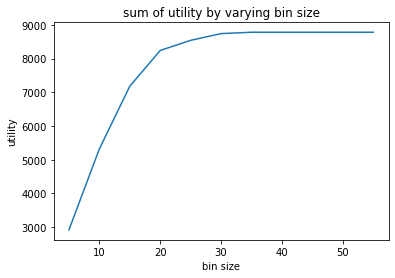

In [14]:
plotNetworkVaryParams(bin_dict["outcomeNetwork"],'utility',"bin size",fig_label="vary/vary_bin",metric="sum")

outcome network  {0.0: <populationGraph.populationGraph object at 0x0000022BC34E03A0>, 10.0: <populationGraph.populationGraph object at 0x0000022BC56698A0>, 20.0: <populationGraph.populationGraph object at 0x0000022BC37F1F60>, 30.0: <populationGraph.populationGraph object at 0x0000022BC37F3670>, 40.0: <populationGraph.populationGraph object at 0x0000022BC2A76C20>, 50.0: <populationGraph.populationGraph object at 0x0000022BC2A76050>, 60.0: <populationGraph.populationGraph object at 0x0000022BC2B3FC40>, 70.0: <populationGraph.populationGraph object at 0x0000022BC2B3C580>, 80.0: <populationGraph.populationGraph object at 0x0000022BC34E2740>, 90.0: <populationGraph.populationGraph object at 0x0000022BC33DE1A0>}


[11, 27, 39, 40, 40, 40, 40, 40, 40, 40]

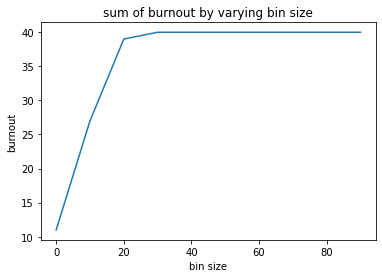

In [ ]:
plotNetworkVaryParams(bin_dict["outcomeNetwork"],'burnout',"bin size")

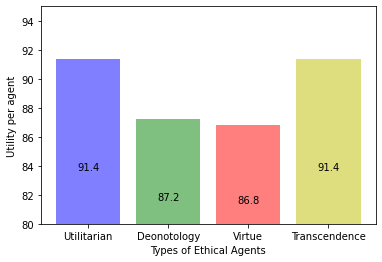

In [ ]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'utility')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'utility')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(80,95)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+38,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Utility per agent")
plt.savefig("results/best_bar/utility.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")

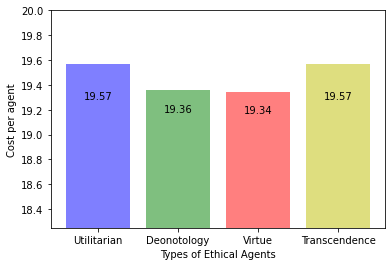

In [ ]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'cost')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'cost')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(18.25,20)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+9.5,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Cost per agent")
plt.savefig("results/best_bar/cost.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")

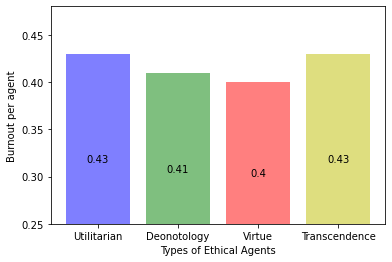

In [ ]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'burnout')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'burnout')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(0.25,0.48)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+0.1,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Burnout per agent")
plt.savefig("results/best_bar/burnout.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")
    

In [2]:
burnout_deontic = pickle.load(open('pickle_files/burnoutThreshold/deontic.pkl', 'rb'))
burnout_util = pickle.load(open('pickle_files/burnoutThreshold/utilitarian.pkl', 'rb'))
burnout_virtue = pickle.load(open('pickle_files/burnoutThreshold/virtue.pkl', 'rb'))
burnout_trans = pickle.load(open('pickle_files/burnoutThreshold/trans(0.5).pkl', 'rb'))
burnout_trans_low = pickle.load(open('pickle_files/burnoutThreshold/trans(0.1).pkl', 'rb'))
burnout_trans_high = pickle.load(open('pickle_files/burnoutThreshold/trans(1).pkl', 'rb'))

In [3]:
burnout_dict = {"Deontology":burnout_deontic["outcomeNetwork"],
"Utilitarian":burnout_util["outcomeNetwork"],
  "Virtue":burnout_virtue["outcomeNetwork"],
  "Transcendence":burnout_trans["outcomeNetwork"]}
burnout_trans_dict = {0.1:burnout_trans_low["outcomeNetwork"],1:burnout_trans_high["outcomeNetwork"]}

In [ ]:
y_low = [np.sum(getNetworkProp(burnout_trans_dict[0.1][val].getGraph(), 'utility')) for val in burnout_trans_dict[0.1]]

Text(0, 0.5, 'utility')

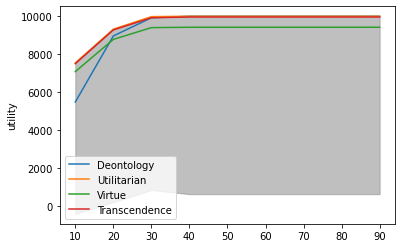

In [20]:
metric = "sum"
fig, ax = plt.subplots()
for outcome in burnout_dict:
    if(metric=="sum"):
        y_vals = [np.sum(getNetworkProp(burnout_dict[outcome][val].getGraph(), 'utility')) for val in burnout_dict[outcome]]
    elif(metric=="mean"):
        
        # y_std = [np.std(getNetworkProp(outcomeNetwork[val].getGraph(), prop)) for val in outcomeNetwork]
        # y_stderror = [value/len(y_std) for value in y_std]
        # if(prop=='burnout'or prop=='utility' or prop=='cost'):
        #     y_vals=[np.sum(getNetworkProp(outcomeDict[outcome][val].getGraph(), prop))/(outcomeDict[outcome][val].getNumNodes()*(1-val)) for val in outcomeDict[outcome]]
        # else:
            y_vals = [np.mean(getNetworkProp(burnout_dict[outcome][val].getGraph(), 'utility')) for val in burnout_dict[outcome]]
    ax.plot(list(burnout_dict[outcome].keys()), y_vals)
if(metric=="mean"):
    # In case of Adv Ratio, uncomment this
    # if(prop=='burnout' or prop=='utility' or prop=='cost'):
    #     y_low = [np.sum(getNetworkProp(transDict[0.1][val].getGraph(),prop))/(transDict[0.1][val].getNumNodes()*(1-val)) for val in transDict[0.1]]
    #     y_high = [np.sum(getNetworkProp(transDict[1][val].getGraph(),prop))/(transDict[1][val].getNumNodes()*(1-val)) for val in transDict[1]]
    y_low = [np.mean(getNetworkProp(burnout_trans_dict[0.1][val].getGraph(), 'utility')) for val in burnout_trans_dict[0.1]]
    y_high = [np.mean(getNetworkProp(burnout_trans_dict[1][val].getGraph(), 'utility')) for val in burnout_trans_dict[1]]
else:
    y_low = [np.sum(getNetworkProp(burnout_trans_dict[0.1][val].getGraph(), 'utility')) for val in burnout_trans_dict[0.1]]
    y_high = [np.sum(getNetworkProp(burnout_trans_dict[1][val].getGraph(), 'utility')) for val in burnout_trans_dict[1]]
ax.fill_between(burnout_trans_dict[0.1].keys(),y_low,y_high,color='grey',alpha=0.5)
# plotAsPerType(list(outcomeNetwork.keys()), y_vals, y_stderror, ax, plotType)
# ax.set_xticks(range(len(outcomeNetwork)),list(outcomeNetwork))
ax.legend(burnout_dict.keys())
# ax.set_xlabel(attr)
ax.set_ylabel('utility')
# if(metric=="mean"):
#     ax.set_title("Average "+prop+" by varying "+attr)
# else:
#     ax.set_title(metric+" of "+prop+" by varying "+attr)

[7500, 9280, 9920, 9960, 9960, 9960, 9960, 9960, 9960]

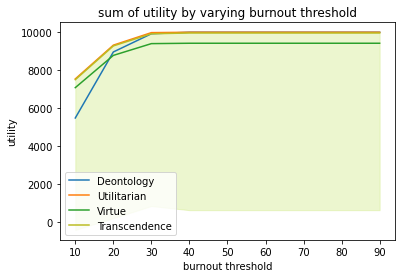

In [9]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"utility","burnout threshold",fig_label="burnout_thresh/utility")

[1875.0, 1964.0, 1996.0, 1998.0, 1998.0, 1998.0, 1998.0, 1998.0, 1998.0]

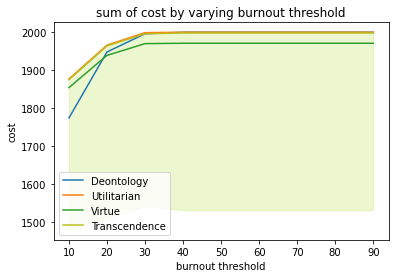

In [8]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"cost","burnout threshold",fig_label="burnout_thresh/cost")

[123, 34, 1, 0, 0, 0, 0, 0, 0]

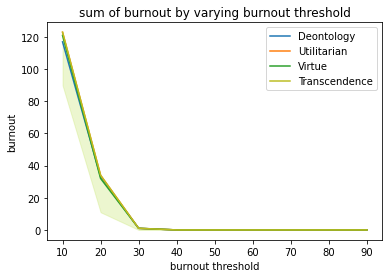

In [7]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"burnout","burnout threshold",fig_label="burnout_thresh/burnout")